<a href="https://colab.research.google.com/github/tyrypic/python-pil-labworks/blob/main/variant2_lab6_perlik_k_4_101_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа №6: «Классификация изображений»  
**Вариант 2: сверточная нейронная сеть**

**Задание:**
1. Загрузить набор MNIST (60 000 тренировочных и 10 000 тестовых изображений 28×28).
2. Построить эталонную полносвязную сеть (Dense) для классификации цифр, оценить точность на тестовой выборке.
3. Построить сверточную нейронную сеть (CNN) для той же задачи, оценить точность.
4. Сравнить результаты Dense vs CNN.
5. Проверить работу CNN на собственных изображениях из папки `images/` (0.jpg–9.jpg).  
   Предварительная обработка: преобразовать в градации серого, изменить размер до 28×28, нормализовать, инвертировать цвета.

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


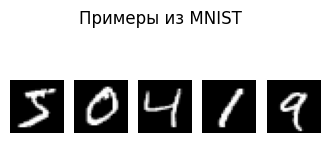

In [1]:
# 1. Импорты и загрузка MNIST
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from PIL import Image
import os

# Параметры
img_rows, img_cols = 28, 28
batch_size = 128
num_classes = 10
epochs = 5

# Загрузка данных
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Визуализация примера
plt.figure(figsize=(4,2))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.axis('off')
plt.suptitle('Примеры из MNIST')
plt.show()

In [2]:
# 2. Предобработка данных для Dense (Flatten)
x_train_flat = x_train.reshape(-1, img_rows*img_cols).astype('float32') / 255
x_test_flat  = x_test.reshape(-1, img_rows*img_cols).astype('float32') / 255

y_train_cat = keras.utils.to_categorical(y_train, num_classes)
y_test_cat  = keras.utils.to_categorical(y_test, num_classes)

In [3]:
# 3. Полносвязная модель (Dense)
dense_model = models.Sequential([
    layers.Input(shape=(img_rows*img_cols,)),
    layers.Dense(512, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(num_classes, activation='softmax'),
])

dense_model.compile(loss='categorical_crossentropy',
                    optimizer='adam',
                    metrics=['accuracy'])

history_dense = dense_model.fit(x_train_flat, y_train_cat,
                                batch_size=batch_size,
                                epochs=epochs,
                                validation_split=0.1)

score_dense = dense_model.evaluate(x_test_flat, y_test_cat, verbose=0)
print(f"Dense Test loss: {score_dense[0]:.4f}, accuracy: {score_dense[1]:.4f}")

Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.8666 - loss: 0.4499 - val_accuracy: 0.9698 - val_loss: 0.1035
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9724 - loss: 0.0913 - val_accuracy: 0.9767 - val_loss: 0.0796
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9830 - loss: 0.0545 - val_accuracy: 0.9757 - val_loss: 0.0795
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9875 - loss: 0.0382 - val_accuracy: 0.9805 - val_loss: 0.0645
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9915 - loss: 0.0266 - val_accuracy: 0.9785 - val_loss: 0.0801
Dense Test loss: 0.0712, accuracy: 0.9794


In [4]:
# 4. Подготовка данных для CNN
x_train_cnn = x_train.reshape(-1, img_rows, img_cols, 1).astype('float32') / 255
x_test_cnn  = x_test.reshape(-1, img_rows, img_cols, 1).astype('float32') / 255

In [5]:
# 5. Сверточная нейронная сеть (CNN)
cnn_model = models.Sequential([
    layers.Input(shape=(img_rows, img_cols, 1)),
    layers.Conv2D(32, kernel_size=(3,3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax'),
])

cnn_model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

history_cnn = cnn_model.fit(x_train_cnn, y_train_cat,
                            batch_size=batch_size,
                            epochs=epochs,
                            validation_split=0.1)

score_cnn = cnn_model.evaluate(x_test_cnn, y_test_cat, verbose=0)
print(f"CNN Test loss: {score_cnn[0]:.4f}, accuracy: {score_cnn[1]:.4f}")

Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 56s 129ms/step - accuracy: 0.8493 - loss: 0.5057 - val_accuracy: 0.9822 - val_loss: 0.0637
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 52s 123ms/step - accuracy: 0.9814 - loss: 0.0603 - val_accuracy: 0.9865 - val_loss: 0.0446
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 54s 128ms/step - accuracy: 0.9877 - loss: 0.0390 - val_accuracy: 0.9867 - val_loss: 0.0430
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 80s 123ms/step - accuracy: 0.9909 - loss: 0.0288 - val_accuracy: 0.9912 - val_loss: 0.0350
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 53s 125ms/step - accuracy: 0.9931 - loss: 0.0212 - val_accuracy: 0.9890 - val_loss: 0.0381
CNN Test loss: 0.0319, accuracy: 0.9890


Dense accuracy: 0.9794
CNN   accuracy: 0.9890


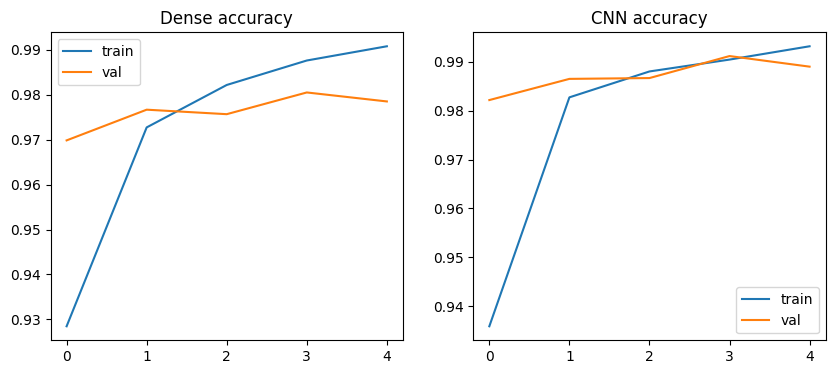

In [6]:
# 6. Сравнение результатов
print(f"Dense accuracy: {score_dense[1]:.4f}")
print(f"CNN   accuracy: {score_cnn[1]:.4f}")

# Показать кривые обучения
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history_dense.history['accuracy'], label='train')
plt.plot(history_dense.history['val_accuracy'], label='val')
plt.title('Dense accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history_cnn.history['accuracy'], label='train')
plt.plot(history_cnn.history['val_accuracy'], label='val')
plt.title('CNN accuracy')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


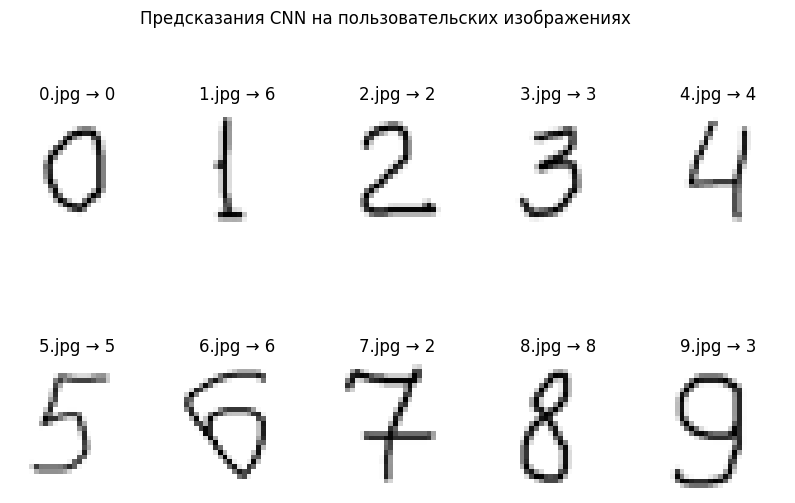

In [7]:
# 7. Предсказания на собственных изображениях
img_dir = 'images'
custom_files = sorted([f for f in os.listdir(img_dir) if f.lower().endswith(('.png','.jpg'))])

plt.figure(figsize=(10,6))
for i, fname in enumerate(custom_files):
    path = os.path.join(img_dir, fname)
    img = Image.open(path).convert('L').resize((img_rows, img_cols))
    arr = np.array(img)
    # Инвертируем: фон белый -> цифра черная
    arr = 255 - arr
    arr = arr.astype('float32') / 255
    arr = arr.reshape(1, img_rows, img_cols, 1)
    pred = cnn_model.predict(arr)
    label = np.argmax(pred, axis=1)[0]
    plt.subplot(2,5,i+1)
    plt.imshow(img, cmap='gray')
    plt.title(f"{fname} → {label}")
    plt.axis('off')
plt.suptitle('Предсказания CNN на пользовательских изображениях')
plt.show()